In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#read dataset
data = pd.read_csv('Master_Data.csv')
data

,student_id,minutes_watched,days_engage,eng_quiz,eng_exam,eng_hub_qa,st_purch
0,258798,0.3,1,0,0,0,0
1,258799,0.0,0,0,0,0,0
2,258800,531.2,29,1,1,0,1
3,258801,0.0,0,0,0,0,0
4,258802,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...
35221,283704,3.0,1,0,0,0,0
35222,284550,67.5,7,1,1,0,0
35223,284790,801.2,8,1,1,0,0
35224,286959,86.4,2,1,1,0,0


In [ ]:
data.head()

,student_id,minutes_watched,days_engage,eng_quiz,eng_exam,eng_hub_qa,st_purch
0,258798,0.3,1,0,0,0,0
1,258799,0.0,0,0,0,0,0
2,258800,531.2,29,1,1,0,1
3,258801,0.0,0,0,0,0,0
4,258802,0.0,0,0,0,0,0


In [ ]:
#check the structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35226 entries, 0 to 35225
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       35226 non-null  int64  
 1   minutes_watched  35226 non-null  float64
 2   days_engage      35226 non-null  int64  
 3   eng_quiz         35226 non-null  int64  
 4   eng_exam         35226 non-null  int64  
 5   eng_hub_qa       35226 non-null  int64  
 6   st_purch         35226 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 1.9 MB


In [ ]:
#find the number of rows and columns
data.shape

(35226, 7)

In [ ]:
#describe the numerical columns
data.describe()

,student_id,minutes_watched,days_engage,eng_quiz,eng_exam,eng_hub_qa,st_purch
count,35226.000000,35226.000000,35226.000000,35226.000000,35226.000000,35226.000000,35226.000000
mean,277003.901635,52.295943,1.855760,0.212513,0.110969,0.008204,0.060609
std,10555.955190,285.604205,6.740604,0.409092,0.314098,0.090206,0.238614
min,258798.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,267816.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277001.500000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,286075.750000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,295515.000000,7642.100000,155.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#find the missing values
data.isnull().sum()

student_id         0
minutes_watched    0
days_engage        0
eng_quiz           0
eng_exam           0
eng_hub_qa         0
st_purch           0
dtype: int64

In [ ]:
#find features with one/unique value
for column in data.columns:
  print(column,data[column].nunique())

student_id 35226
minutes_watched 2948
days_engage 115
eng_quiz 2
eng_exam 2
eng_hub_qa 2
st_purch 2


Therefore no feature with one value

In [ ]:
df = pd.DataFrame(data)

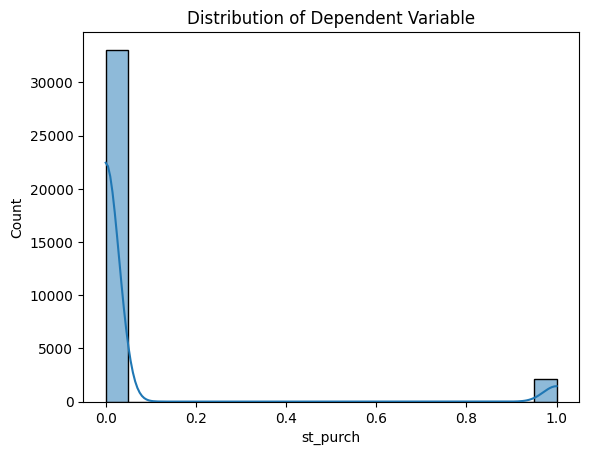

In [ ]:
sns.histplot(df['st_purch'], bins=20, kde=True)
plt.title('Distribution of Dependent Variable')
plt.show()

<Axes: >

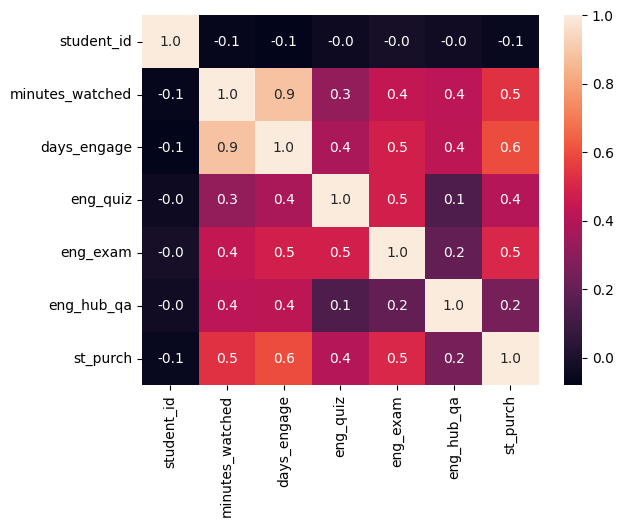

In [ ]:
sns.heatmap(data.corr(), annot = True, fmt="0.1f")

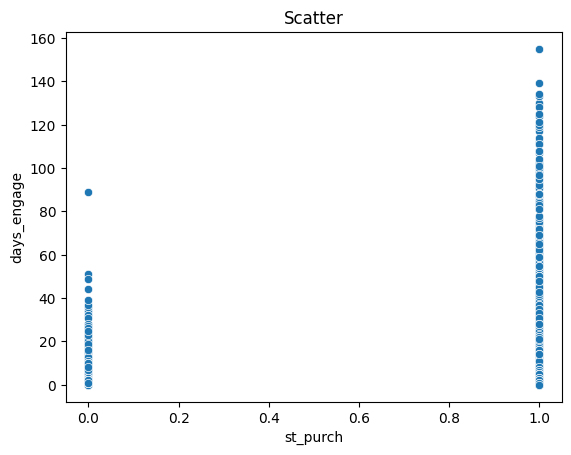

In [ ]:
sns.scatterplot(x='st_purch', y = 'days_engage', data=df, palette='Set1')
plt.title('Scatter')
plt.show()

In [ ]:
y = data.iloc[:, -1]
x = data.iloc[:,0:6]
x

,student_id,minutes_watched,days_engage,eng_quiz,eng_exam,eng_hub_qa
0,258798,0.3,1,0,0,0
1,258799,0.0,0,0,0,0
2,258800,531.2,29,1,1,0
3,258801,0.0,0,0,0,0
4,258802,0.0,0,0,0,0
...,...,...,...,...,...,...
35221,283704,3.0,1,0,0,0
35222,284550,67.5,7,1,1,0
35223,284790,801.2,8,1,1,0
35224,286959,86.4,2,1,1,0


In [ ]:
y

0        0
1        0
2        1
3        0
4        0
        ..
35221    0
35222    0
35223    0
35224    0
35225    0
Name: st_purch, Length: 35226, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model and fit it to the training data
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

# Predict on the test data using the trained model
y_pred1 = lr_model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

con_mat = confusion_matrix(y_test, y_pred1)
print(con_mat)
print(metrics.classification_report(y_test,y_pred1))




Accuracy: 0.963383479988646
[[6605   32]
 [ 226  183]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6637
           1       0.85      0.45      0.59       409

    accuracy                           0.96      7046
   macro avg       0.91      0.72      0.78      7046
weighted avg       0.96      0.96      0.96      7046



In [ ]:

skfold = StratifiedKFold(n_splits=3)
print("Cross-validation scores:\n{}".format(cross_val_score(lr_model, x,y, cv=skfold)))
print("Cross-validation scores:\n{}".format(np.mean(cross_val_score(lr_model, x,y, cv=skfold))))



Cross-validation scores:
[0.97325839 0.96227219 0.9629535 ]
Cross-validation scores:
0.966161358087776


In [ ]:
kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(cross_val_score(lr_model, x,y, cv=kfold)))
print("Cross-validation scores:\n{}".format(np.mean(cross_val_score(lr_model, x,y, cv=kfold))))

Cross-validation scores:
[0.96338348 0.96323634 0.96124911 0.97217885 0.9656494 ]
Cross-validation scores:
0.9651394355293119


In [ ]:
# Define the logistic regression model
logreg = LogisticRegression()

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1.0, 10.0],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear']  # Solver algorithm
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best estimator (fitted model) from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_predg = best_model.predict(x_test)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

# Evaluate the model on the test set
test_score = grid_search.score(x_test, y_test)
print("Test Accuracy Score: ", test_score)

Best Hyperparameters:  {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy Score:  0.9691625266146204
Test Accuracy Score:  0.9703377803008799


In [ ]:
# Initialize the Naive Bayes classifier
clf = GaussianNB()

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred2 = clf.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

con_mat = confusion_matrix(y_test, y_pred2)
print(con_mat)
print(metrics.classification_report(y_test,y_pred2))

Accuracy: 0.9673573658813511
[[6551   86]
 [ 144  265]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6637
           1       0.75      0.65      0.70       409

    accuracy                           0.97      7046
   macro avg       0.87      0.82      0.84      7046
weighted avg       0.97      0.97      0.97      7046



In [ ]:
Gmodel = GaussianNB()
Gmodel.fit(x_train, y_train)

predicted_train2 = Gmodel.predict(x_train)
predicted_test2 = Gmodel.predict(x_test)

print("The train accuracy of Gaussian Naive Bayes model is : ", metrics.accuracy_score(y_train, predicted_train2))
print("The test accuracy of Gaussian Naive Bayes model is : ", metrics.accuracy_score(y_test, predicted_test2))

The train accuracy of Gaussian Naive Bayes model is :  0.9676011355571327
The test accuracy of Gaussian Naive Bayes model is :  0.9673573658813511


In [ ]:
skfold = StratifiedKFold(n_splits=3)
print("Cross-validation scores:\n{}".format(cross_val_score(Gmodel, x,y, cv=skfold)))
print("Cross-validation scores:\n{}".format(np.mean(cross_val_score(Gmodel, x,y, cv=skfold))))

Cross-validation scores:
[0.96806336 0.96661557 0.96286834]
Cross-validation scores:
0.9658490887412707


In [ ]:
kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(cross_val_score(Gmodel, x,y, cv=kfold)))
print("Cross-validation scores:\n{}".format(np.mean(cross_val_score(Gmodel, x,y, cv=kfold))))

Cross-validation scores:
[0.96835084 0.96735273 0.96792051 0.96039744 0.97104329]
Cross-validation scores:
0.9670129637803448


In [ ]:
# Define the Naive Bayes model
nb = GaussianNB()

# Define the parameter grid for grid search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(nb, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best estimator (fitted model) from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_predg = best_model.predict(x_test)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

# Evaluate the model on the test set
test_score = grid_search.score(x_test, y_test)
print("Test Accuracy Score: ", test_score)


Best Hyperparameters:  {'var_smoothing': 1e-08}
Best Accuracy Score:  0.9679559971611071
Test Accuracy Score:  0.9686346863468634


In [ ]:
# Create an SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred3 = svm_classifier.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)
con_mat = confusion_matrix(y_test, y_pred3)
print(con_mat)
print(metrics.classification_report(y_test,y_pred3))

Accuracy: 0.9419528810672723
[[6637    0]
 [ 409    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      6637
           1       0.00      0.00      0.00       409

    accuracy                           0.94      7046
   macro avg       0.47      0.50      0.49      7046
weighted avg       0.89      0.94      0.91      7046



In [ ]:
model = SVC()
model.fit(x_train, y_train)

predicted_train3 = model.predict(x_train)
predicted_test3 = model.predict(x_test)

print("The train accuracy of SVM model is : ", metrics.accuracy_score(y_train, predicted_train3))
print("The test accuracy of SVM model is : ", metrics.accuracy_score(y_test, predicted_test3))

con_mat = confusion_matrix(y_test, predicted_test3)
con_mat

The train accuracy of SVM model is :  0.9387508871540099
The test accuracy of SVM model is :  0.9419528810672723


array([[6637,    0],
       [ 409,    0]])

In [ ]:
skfold = StratifiedKFold(n_splits=3)
print("Cross-validation scores:\n{}".format(cross_val_score(svm_classifier, x,y, cv=skfold)))
print("Cross-validation scores:\n{}".format(np.mean(cross_val_score(svm_classifier, x,y, cv=skfold))))

Cross-validation scores:
[0.93944813 0.93936297 0.93936297]
Cross-validation scores:
0.9393913586555386


In [ ]:
kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(cross_val_score(svm_classifier, x,y, cv=kfold)))
print("Cross-validation scores:\n{}".format(np.mean(cross_val_score(svm_classifier, x,y, cv=kfold))))

Cross-validation scores:
[0.92038036 0.93229241 0.93924769 0.95131299 0.95372605]
Cross-validation scores:
0.9393918983574834


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


X_trainval, X_test, y_trainval, y_test = train_test_split( x,y, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split( X_trainval, y_trainval, random_state=1)
print("Size of training set: {} size of validation set: {} size of test set:" " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0
for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm = SVC(C=C)
    svm.fit(X_train, y_train)
    score = svm.score(X_valid, y_valid)
    if score > best_score:
        best_score = score
        best_parameters = {'C': C}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))


Size of training set: 19814 size of validation set: 6605 size of test set: 8807

Best score on validation set: 0.95
Best parameters:  {'C': 100}
Test set score with best parameters: 0.95


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
from sklearn.metrics import classification_report

# Define the SVM model
svm = SVC()

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best estimator (fitted model) from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_preds = best_model.predict(x_test)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

# Evaluate the model on the test set
test_score = grid_search.score(x_test, y_test)
print("Test Accuracy Score: ", test_score)
train_score = grid_search.score(x_train, y_train)

classification_rep = classification_report(y_test, y_preds)
print("Classification Report:\n", classification_rep)


Best Hyperparameters:  {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy Score:  0.9706174591909156
Test Accuracy Score:  0.9700539313085439
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      6637
           1       0.88      0.56      0.68       409

    accuracy                           0.97      7046
   macro avg       0.93      0.78      0.83      7046
weighted avg       0.97      0.97      0.97      7046



In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred4 = clf.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy)
con_mat = confusion_matrix(y_test, y_pred4)
print(con_mat)
print(metrics.classification_report(y_test,y_pred4))

Accuracy: 0.9696281578200397
[[6578   59]
 [ 155  254]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6637
           1       0.81      0.62      0.70       409

    accuracy                           0.97      7046
   macro avg       0.89      0.81      0.84      7046
weighted avg       0.97      0.97      0.97      7046



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the KNN model
knn = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': range(1,20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best estimator (fitted model) from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_predk = best_model.predict(x_test)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

# Evaluate the model on the test set
test_score = grid_search.score(x_test, y_test)
print("Test Accuracy Score: ", test_score)


Best Hyperparameters:  {'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
Best Accuracy Score:  0.9706174591909156
Test Accuracy Score:  0.9718989497587284


In [ ]:
kmodel = KNeighborsClassifier(n_neighbors = 11)
kmodel.fit(x_train, y_train)

predicted_traink = kmodel.predict(x_train)
predicted_testk = kmodel.predict(x_test)

confu = metrics.confusion_matrix(y_test, predicted_testk)
confu1 = metrics.confusion_matrix(y_train, predicted_traink)
print(metrics.confusion_matrix(y_test, predicted_testk))
print("The train accuracy of KNN model is : ", metrics.accuracy_score(y_train, predicted_traink))
print("The test accuracy of KNN model is : ", metrics.accuracy_score(y_test, predicted_testk))

[[6594   43]
 [ 159  250]]
The train accuracy of KNN model is :  0.9723562810503904
The test accuracy of KNN model is :  0.9713312517740562


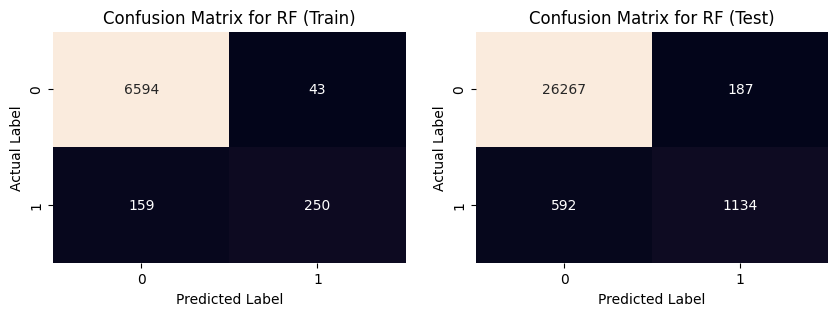

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
sns.heatmap(confu,annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for RF (Train)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

plt.subplot(1,2,2)
sns.heatmap(confu1,annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for RF (Test)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [ ]:
# Initialize the Random Forest classifier
Random = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
Random.fit(x_train, y_train)

# Make predictions on the test data
y_pred5 = Random.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy:", accuracy)

con_mat = confusion_matrix(y_test, y_pred5)
con_mat

Accuracy: 0.9653704229349985


array([[6549,   88],
       [ 156,  253]])

In [ ]:
skfold = StratifiedKFold(n_splits=3)
print("Cross-validation scores:\n{}".format(cross_val_score(Random, x,y, cv=skfold)))
print("Cross-validation scores:\n{}".format(np.mean(cross_val_score(Random, x,y, cv=skfold))))

Cross-validation scores:
[0.06123318 0.54019758 0.93944813]
Cross-validation scores:
0.5136262987566003


In [ ]:
kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(cross_val_score(Random, x,y, cv=kfold)))
print("Cross-validation scores:\n{}".format(np.mean(cross_val_score(Random, x,y, cv=kfold))))

Cross-validation scores:
[0.96437695 0.96962385 0.96792051 0.96621718 0.97132718]
Cross-validation scores:
0.9678931333725631


In [ ]:
rmodel=RandomForestClassifier(random_state = 1)
rmodel.fit(x_train, y_train)

predicted_trainr = rmodel.predict(x_train)
predicted_testr = rmodel.predict(x_test)

print(metrics.confusion_matrix(y_test, predicted_testr))
print("The train accuracy of KNN model is : ", metrics.accuracy_score(y_train, predicted_trainr)*100, "%")
print("The test accuracy of KNN model is : ", metrics.accuracy_score(y_test, predicted_testr)*100, "%")

[[6546   91]
 [ 150  259]]
The train accuracy of KNN model is :  99.99290276792051 %
The test accuracy of KNN model is :  96.57961964235027 %


In [ ]:
predicted = rmodel.predict(x_test)
predicted

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6637
           1       0.74      0.63      0.68       409

    accuracy                           0.97      7046
   macro avg       0.86      0.81      0.83      7046
weighted avg       0.96      0.97      0.96      7046



In [ ]:
# Define the Random Forest model
rf = RandomForestClassifier()

# Define the parameter grid for grid search
# Define the parameter grid
param_grid = {
    'n_estimators': [60,70,80,100, ],
    'max_depth': [None, 5, 10],
    'max_depth': [5,6,7],
    'max_features': [4,5,6],
    'min_samples_leaf': [2, 4,10,15],
    'min_samples_split': [10,50,60,70],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(x_train, y_train)



# Get the best estimator (fitted model) from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

# Evaluate the model on the test set
test_score = grid_search.score(x_test, y_test)
print("Test Accuracy Score: ", test_score)


KeyboardInterrupt: ignored

In [ ]:
print(grid_search.best_params_) #best parameters of logit for tuning

best_grid = grid_search.best_estimator_ #acquiring the best estimator for logit
print(best_grid)

AttributeError: ignored

In [ ]:
grid_rfcl_train_acc = best_grid.score(x_train,y_train)
print('Accuracy score for train data',grid_rfcl_train_acc)

grid_rfcl_test_acc = best_grid.score(x_test,y_test)
print('Accuracy score for test data',grid_rfcl_test_acc)

In [ ]:
grid_rfcl_pred = best_grid.predict(x_train) #prediction of the training set
grid_rfcl_pred1 = best_grid.predict(x_test) #prediction of the test set

grid_rfcl_prob = best_grid.predict_proba(x_train) #probability prediction of the training set
grid_rfcl_prob1 = best_grid.predict_proba(x_test) #probability prediction of the test set

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(y_train,grid_rfcl_pred),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for RF (Train)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(y_test,grid_rfcl_pred1),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for RF (Test)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [ ]:
print('Classification Report for the training set\n\n',metrics.classification_report(y_train, grid_rfcl_pred),'\n')
print('Classification Report \n\n',metrics.classification_report(y_test, grid_rfcl_pred1))